<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

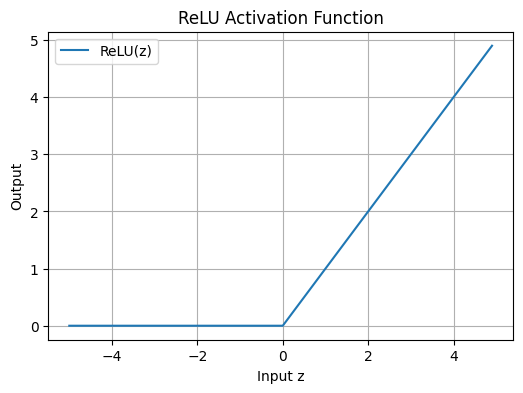

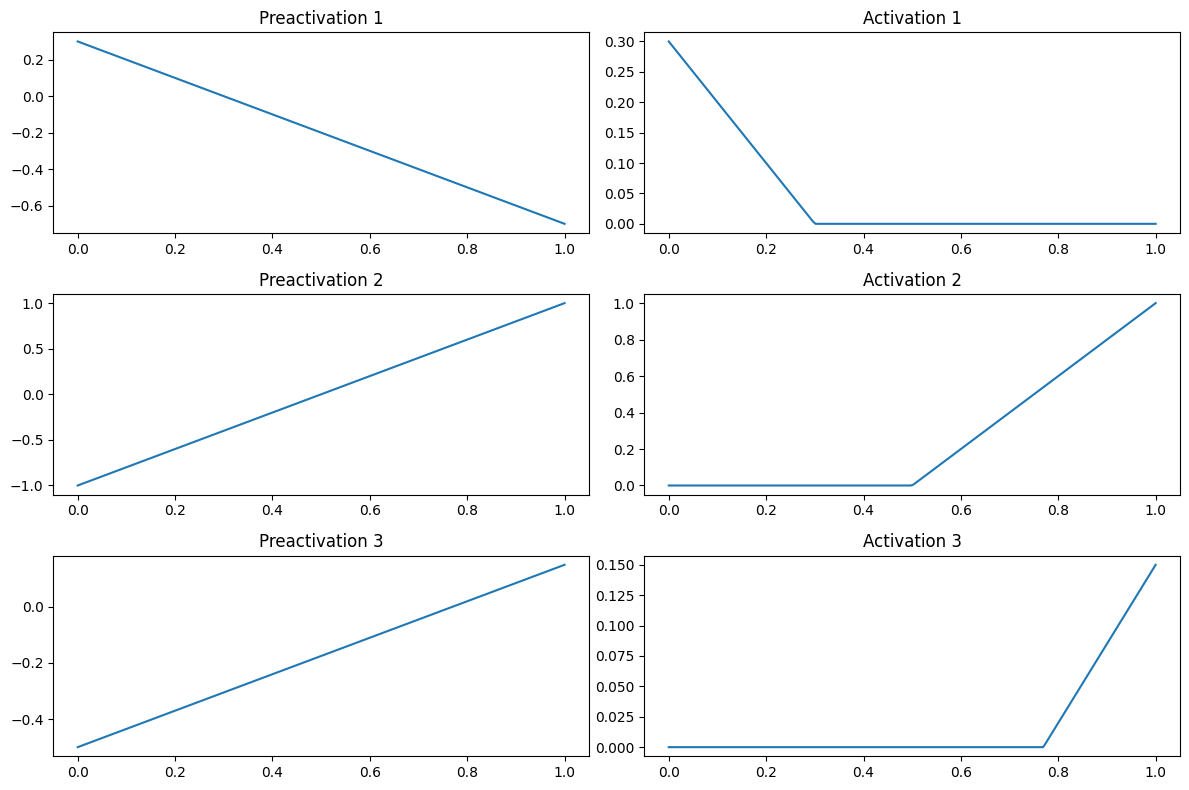

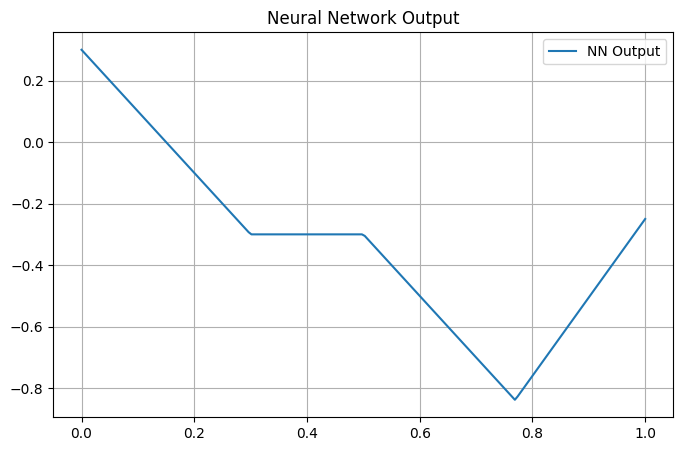

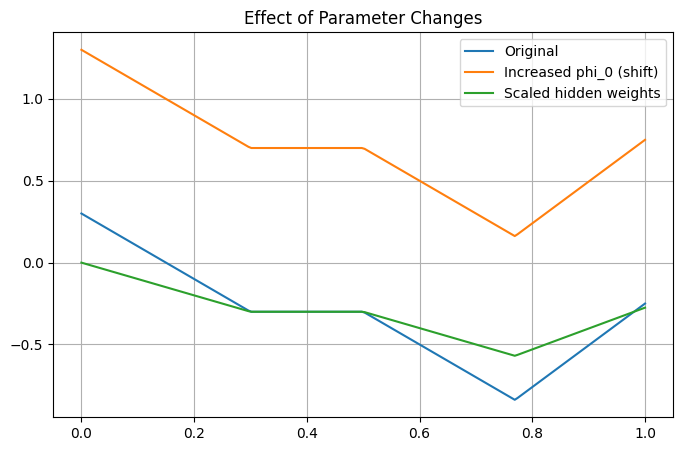

Least Squares Loss: 19.11009582356878


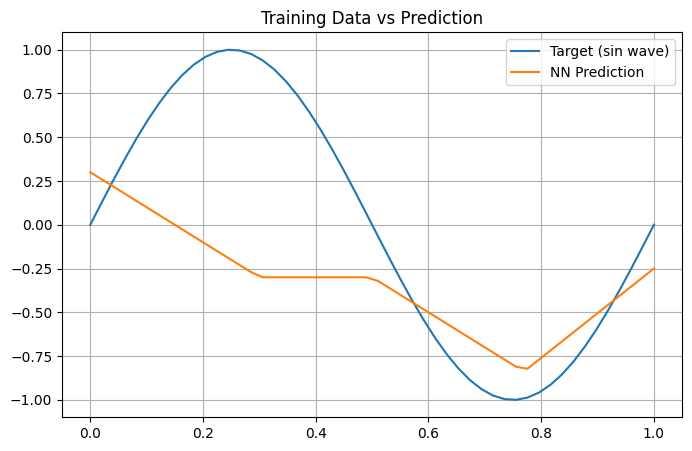

In [2]:

import numpy as np
import matplotlib.pyplot as plt


def ReLU(preactivation):

    return np.maximum(0, preactivation)

z = np.arange(-5, 5, 0.1)
ReLU_z = ReLU(z)

plt.figure(figsize=(6,4))
plt.plot(z, ReLU_z, label="ReLU(z)")
plt.title("ReLU Activation Function")
plt.xlabel("Input z")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.show()


def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3,
                  theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):

    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x

    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3


def plot_neural(x, y, pre_1, pre_2, pre_3,
                act_1, act_2, act_3,
                w_act_1, w_act_2, w_act_3,
                plot_all=False, x_data=None, y_data=None):

    if plot_all:
        plt.figure(figsize=(12,8))
        plt.subplot(3,2,1); plt.plot(x, pre_1); plt.title("Preactivation 1")
        plt.subplot(3,2,2); plt.plot(x, act_1); plt.title("Activation 1")
        plt.subplot(3,2,3); plt.plot(x, pre_2); plt.title("Preactivation 2")
        plt.subplot(3,2,4); plt.plot(x, act_2); plt.title("Activation 2")
        plt.subplot(3,2,5); plt.plot(x, pre_3); plt.title("Preactivation 3")
        plt.subplot(3,2,6); plt.plot(x, act_3); plt.title("Activation 3")
        plt.tight_layout()
        plt.show()


    plt.figure(figsize=(8,5))
    plt.plot(x, y, label="NN Output")
    plt.title("Neural Network Output")
    if x_data is not None and y_data is not None:
        plt.scatter(x_data, y_data, color="red", label="Training Data")
    plt.legend()
    plt.grid(True)
    plt.show()


theta_10 = 0.3 ; theta_11 = -1.0
theta_20 = -1.0 ; theta_21 = 2.0
theta_30 = -0.5 ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

x = np.linspace(0, 1, 200)
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = shallow_1_1_3(
    x, ReLU, phi_0, phi_1, phi_2, phi_3,
    theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3,
            w_act_1, w_act_2, w_act_3, plot_all=True)



y_orig, *_ = shallow_1_1_3(x, ReLU, phi_0, phi_1, phi_2, phi_3,
                           theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

y_shift, *_ = shallow_1_1_3(x, ReLU, phi_0 + 1.0, phi_1, phi_2, phi_3,
                            theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

y_scaled, *_ = shallow_1_1_3(x, ReLU, phi_0, phi_1*0.5, phi_2*0.5, phi_3*0.5,
                             theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

plt.figure(figsize=(8,5))
plt.plot(x, y_orig, label="Original")
plt.plot(x, y_shift, label="Increased phi_0 (shift)")
plt.plot(x, y_scaled, label="Scaled hidden weights")
plt.legend()
plt.title("Effect of Parameter Changes")
plt.grid(True)
plt.show()


def least_squares_loss(y_train, y_predict):
    return np.sum((y_train - y_predict) ** 2)


x_train = np.linspace(0, 1, 50)
y_train = np.sin(2 * np.pi * x_train)


y_pred, *_ = shallow_1_1_3(x_train, ReLU, phi_0, phi_1, phi_2, phi_3,
                           theta_10, theta_11, theta_20, theta_21, theta_30, theta_31)

loss = least_squares_loss(y_train, y_pred)
print("Least Squares Loss:", loss)


plt.figure(figsize=(8,5))
plt.plot(x_train, y_train, label="Target (sin wave)")
plt.plot(x_train, y_pred, label="NN Prediction")
plt.legend()
plt.title("Training Data vs Prediction")
plt.grid(True)
plt.show()
